Can we predict energy consumption per value added for different sectors in the countries based on historical data from 2015 to 2021? Note: China data is not available in dataset. We want to filter and use 'Constant 2015 prices' to allow for better comparability and analysis as it is a method of adjusting economic data for inflation or deflation where prices are expressed in terms of a base year of 2015.

https://www.iea.org/data-and-statistics/data-product/energy-and-emissions-per-value-added-database

**1. Visual Inspection:**

In [11]:
import pandas as pd

# Define the filenames
file_names = ['VAFilter.xlsx', 'MfgFilter.xlsx', 'IndFilter.xlsx']

# Iterate over each file to get countries with data from desired time frame
for file_name in file_names:
    # Load Excel file
    data = pd.read_excel(file_name)

    # Get unique countries for the years 2015-2021
    unique_countries = data[data['Year'].between(2015, 2021)]['Country'].unique()

    # Count the number of unique countries
    num_countries = len(unique_countries)

    print(f"Number of countries available in {file_name} for 2015-2021: {num_countries}")


Number of countries available in VAFilter.xlsx for 2015-2021: 118
Number of countries available in MfgFilter.xlsx for 2015-2021: 1
Number of countries available in IndFilter.xlsx for 2015-2021: 83


We will disregard MfgFilter.xlsx file as only one country is present.

In [92]:
# Load the Excel file for IndFilter.xlsx
ind_data = pd.read_excel('IndFilter.xlsx')

# Filter out the countries from IndFilter.xlsx that are also present in VAFilter.xlsx
common_countries_data = ind_data[ind_data['Country'].isin(unique_countries)]

# Get unique countries from the filtered data
common_countries = common_countries_data['Country'].unique()

# Count the number of common countries
num_common_countries = len(common_countries)

# Print the number of common countries
print(f"\nNumber of countries available in IndFilter.xlsx for 2015-2021 that are also present in VAFilter.xlsx: {num_common_countries}")

# Print the common countries
print("\nCommon countries between VAFilter.xlsx and IndFilter.xlsx:")
for country in common_countries:
    print(country)



Number of countries available in IndFilter.xlsx for 2015-2021 that are also present in VAFilter.xlsx: 39

Common countries between VAFilter.xlsx and IndFilter.xlsx:
Austria
Belgium
Bulgaria
Canada
Chile
Colombia
Croatia
Cyprus
Czech Republic
Denmark
Estonia
Finland
France
Germany
Greece
Hungary
Iceland
Ireland
Italy
Japan
Latvia
Lithuania
Luxembourg
Mexico
Namibia
Norway
Poland
Portugal
Romania
Serbia
Slovak Republic
Slovenia
Spain
Suriname
Sweden
Switzerland
Thailand
United Kingdom
United States


Show common countries between the two files we are using.

In [93]:
# Load the Excel file for VAFilter.xlsx
va_data = pd.read_excel('VAFilter.xlsx')

# Extract unique countries from VAFilter.xlsx
unique_countries_va = set(va_data['Country'].unique())

# Load the Excel file for IndFilter.xlsx
ind_data = pd.read_excel('IndFilter.xlsx')

# Filter IndFilter.xlsx for countries that are also in VAFilter.xlsx
common_countries_data = ind_data[ind_data['Country'].isin(unique_countries_va)]

# Get unique common countries
common_countries = common_countries_data['Country'].unique()

# Count the number of common countries
num_common_countries = len(common_countries)

# Print statement showing how many countries are shared
print(f"Number of countries shared between VAFilter.xlsx and IndFilter.xlsx: {num_common_countries}")


Number of countries shared between VAFilter.xlsx and IndFilter.xlsx: 74


Filter data for countries that are present in both remaining files.

In [94]:

# Load the Excel file for VAFilter.xlsx
va_data = pd.read_excel('VAFilter.xlsx')

# Extract unique countries from VAFilter.xlsx
unique_countries_va = set(va_data['Country'].unique())

# Load the Excel file for IndFilter.xlsx
ind_data = pd.read_excel('IndFilter.xlsx')

# Filter IndFilter.xlsx for countries that are also in VAFilter.xlsx
common_countries_data = ind_data[ind_data['Country'].isin(unique_countries_va)]

# Get unique common countries
common_countries = common_countries_data['Country'].unique()

# Count the number of common countries
num_common_countries = len(common_countries)

# Print statement showing how many countries are shared
print(f"Number of countries shared between VAFilter.xlsx and IndFilter.xlsx: {num_common_countries}")

# Filter VAFilter.xlsx for common countries
va_common_countries = va_data[va_data['Country'].isin(common_countries)]

# Filter IndFilter.xlsx for common countries
ind_common_countries = ind_data[ind_data['Country'].isin(common_countries)]

# Define output filenames for filtered data
output_filename_va = "VA_CommonCountries.csv"
output_filename_ind = "Ind_CommonCountries.csv"

# Save filtered data to CSV for VAFilter.xlsx
va_common_countries.to_csv(output_filename_va, index=False)
num_unique_va = len(va_common_countries['Country'].unique())  # Count unique countries
print(f"Number of unique countries in {output_filename_va}: {num_unique_va}")

# Save filtered data to CSV for IndFilter.xlsx
ind_common_countries.to_csv(output_filename_ind, index=False)
num_unique_ind = len(ind_common_countries['Country'].unique())  # Count unique countries
print(f"Number of unique countries in {output_filename_ind}: {num_unique_ind}")

Number of countries shared between VAFilter.xlsx and IndFilter.xlsx: 74
Number of unique countries in VA_CommonCountries.csv: 74
Number of unique countries in Ind_CommonCountries.csv: 74


Print columns and a few rows of each file

In [95]:
#Print column and a few rows for VA_CommonCountries.csv
va_common = pd.read_csv('VA_CommonCountries.csv')
print("VA_CommonCountries.csv:")
print(va_common.head())  # Print first 5 rows by default

# Print column and a few rows for Ind_CommonCountries.csv
ind_common = pd.read_csv('Ind_CommonCountries.csv')
print("\nInd_CommonCountries.csv:")
print(ind_common.head())

VA_CommonCountries.csv:
  Country ISO3  Country  Year ISIC Section ISIC Division  \
0          ALB  Albania  2015            A         01-03   
1          ALB  Albania  2015            B         05-09   
2          ALB  Albania  2015            C         10-33   
3          ALB  Albania  2015            D            35   
4          ALB  Albania  2015            E         36-39   

                                  ISIC Division Desc               Measure  \
0                  Agriculture, forestry and fishing  Constant 2015 prices   
1                               Mining and quarrying  Constant 2015 prices   
2                                      Manufacturing  Constant 2015 prices   
3  Electricity, gas, steam and air conditioning s...  Constant 2015 prices   
4  Water supply; sewerage, waste management and r...  Constant 2015 prices   

    Method  Value LCU (Million national currency)  Value USD (Million USD)  \
0  Rebased                              283709.06                  2

Delete columns we will not use.

In [96]:
# Read VA_CommonCountries.csv
va_common = pd.read_csv('VA_CommonCountries.csv')

# List of columns to delete
columns_to_delete = ['Country ISO3', 'ISIC Section', 'ISIC Division', 'Method',
                     'Value LCU (Million national currency)', 'Source']

# Drop columns
va_common_updated = va_common.drop(columns=columns_to_delete)

# Save to VA_Updated.csv
va_common_updated.to_csv('VA_Updated.csv', index=False)

# Print first columns and first few rows of VA_Updated.csv
print("VA_Updated.csv:")
print(va_common_updated.head())

VA_Updated.csv:
   Country  Year                                 ISIC Division Desc  \
0  Albania  2015                  Agriculture, forestry and fishing   
1  Albania  2015                               Mining and quarrying   
2  Albania  2015                                      Manufacturing   
3  Albania  2015  Electricity, gas, steam and air conditioning s...   
4  Albania  2015  Water supply; sewerage, waste management and r...   

                Measure  Value USD (Million USD)  
0  Constant 2015 prices                  2252.34  
1  Constant 2015 prices                   370.86  
2  Constant 2015 prices                   645.81  
3  Constant 2015 prices                   366.14  
4  Constant 2015 prices                    81.10  


In [97]:
# Read Ind_CommonCountries.csv
ind_common = pd.read_csv('Ind_CommonCountries.csv')

# List of columns to delete
columns_to_delete = ['Country ISO3', 'ISIC Division']

# Drop columns
ind_common_updated = ind_common.drop(columns=columns_to_delete)

# Save to Ind_Updated.csv
ind_common_updated.to_csv('Ind_Updated.csv', index=False)

# Print columns and first few rows of Ind_Updated.csv
print("Ind_Updated.csv:")
print(ind_common_updated.head())

Ind_Updated.csv:
   Country  Year          ISIC division description  \
0  Albania  2015  Agriculture, forestry and fishing   
1  Albania  2015               Mining and quarrying   
2  Albania  2015                       Construction   
3  Albania  2016  Agriculture, forestry and fishing   
4  Albania  2016               Mining and quarrying   

                          Indicator  Value                Unit  
0  Per value added carbon intensity   0.04  kgCO2/USD PPP 2015  
1  Per value added carbon intensity   0.05  kgCO2/USD PPP 2015  
2  Per value added carbon intensity   0.00  kgCO2/USD PPP 2015  
3  Per value added carbon intensity   0.04  kgCO2/USD PPP 2015  
4  Per value added carbon intensity   0.13  kgCO2/USD PPP 2015  


Confirm new .csv's

In [98]:
# Define function to print file details
def print_file_details(file_name):
    # Read the CSV file
    df = pd.read_csv(file_name)

    # Print number of rows and columns
    num_rows = len(df)
    num_columns = len(df.columns)

    # Print number of rows and columns
    print(f"File: {file_name}")
    print(f"Number of rows: {num_rows}")
    print(f"Number of columns: {num_columns}")

    # Count unique countries
    unique_countries = df['Country'].nunique()
    print(f"Number of unique countries: {unique_countries}")
    print()

# File names
ind_file = 'Ind_Updated.csv'
va_file = 'VA_Updated.csv'

# Print details for IND_Updated.csv
print_file_details(ind_file)

# Print details for VA_Updated.csv
print_file_details(va_file)

File: Ind_Updated.csv
Number of rows: 6123
Number of columns: 6
Number of unique countries: 74

File: VA_Updated.csv
Number of rows: 8260
Number of columns: 5
Number of unique countries: 74



**2. Data Cleaning:**

In [99]:
# Load Ind_Updated.csv
ind_df = pd.read_csv('Ind_Updated.csv')

# Check for missing values in Ind_Updated.csv
print("Missing values in Ind_Updated.csv:")
print(ind_df.isnull().sum())

# Load VA_Updated.csv
va_df = pd.read_csv('VA_Updated.csv')

# Check for missing values in VA_Updated.csv
print("\nMissing values in VA_Updated.csv:")
print(va_df.isnull().sum())

Missing values in Ind_Updated.csv:
Country                      0
Year                         0
ISIC division description    0
Indicator                    0
Value                        0
Unit                         0
dtype: int64

Missing values in VA_Updated.csv:
Country                      0
Year                         0
ISIC Division Desc           0
Measure                      0
Value USD (Million USD)    410
dtype: int64


Calculate percentage of missing data Value USD (Million USD)    410 is in VA_Updated.csv

In [100]:
# Load VA_Updated.csv into a DataFrame
va_updated = pd.read_csv('VA_Updated.csv')

# Calculate percentage of missing values for each column
missing_percentage = va_updated.isnull().mean() * 100

# Print the results
print("Percentage of missing values in VA_Updated.csv:")
print(missing_percentage)


Percentage of missing values in VA_Updated.csv:
Country                    0.00000
Year                       0.00000
ISIC Division Desc         0.00000
Measure                    0.00000
Value USD (Million USD)    4.96368
dtype: float64


With the amount of data:
VA_Updated.csv has 4.96% missing, we will delete the missing data.

In [101]:
# Load the updated CSV file
va_updated = pd.read_csv('VA_Updated.csv')

# Calculate percentage of missing values
missing_percentage = (va_updated['Value USD (Million USD)'].isnull().sum() / len(va_updated)) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

# Drop rows with missing values in 'Value USD (Million USD)' column
va_updated_cleaned = va_updated.dropna(subset=['Value USD (Million USD)'])

# Save cleaned data to a new CSV file
va_updated_cleaned.to_csv('VA_NewUpdated.csv', index=False)

print(f"Deleted {va_updated.shape[0] - va_updated_cleaned.shape[0]} rows with missing values.")
print(f"Cleaned data saved to 'VA_NewUpdated.csv'.")

Percentage of missing values: 4.96%
Deleted 410 rows with missing values.
Cleaned data saved to 'VA_NewUpdated.csv'.


Rerun for missing values

In [102]:
# Load the cleaned CSV file
va_new_updated = pd.read_csv('VA_NewUpdated.csv')

# Check number of rows and columns
num_rows, num_cols = va_new_updated.shape

# Check for missing values
missing_values = va_new_updated.isnull().sum()

# Print number of rows and columns
print(f"Number of rows in VA_NewUpdated.csv: {num_rows}")
print(f"Number of columns in VA_NewUpdated.csv: {num_cols}")

# Print missing values (if any)
if missing_values.any():
    print("\nMissing values in VA_NewUpdated.csv:")
    print(missing_values)
else:
    print("\nNo missing values found in VA_NewUpdated.csv.")

Number of rows in VA_NewUpdated.csv: 7850
Number of columns in VA_NewUpdated.csv: 5

No missing values found in VA_NewUpdated.csv.


Identify 0 or Nan values.

In [103]:
# Check for NaN values
nan_values = va_new_updated.isnull().sum()

# Check for 0 values
zero_values = (va_new_updated == 0).sum()

# Combine results
missing_or_zero_values = nan_values + zero_values

# Print the combined result
if missing_or_zero_values.any():
    print("\nRows with NaN or 0 values in VA_NewUpdated.csv:")
    print(missing_or_zero_values[missing_or_zero_values > 0])
else:
    print("\nNo NaN or 0 values found in VA_NewUpdated.csv.")


Rows with NaN or 0 values in VA_NewUpdated.csv:
Value USD (Million USD)    65
dtype: int64


In [104]:
# Unique countries with '0' values
countries_with_zero = va_new_updated[va_new_updated['Value USD (Million USD)'] == 0]['Country'].unique()
print("Unique countries with '0' values:")
print(countries_with_zero)

# Unique countries with NaN values
countries_with_nan = va_new_updated[va_new_updated['Value USD (Million USD)'].isnull()]['Country'].unique()
print("\nUnique countries with NaN values:")
print(countries_with_nan)

Unique countries with '0' values:
['Bulgaria' 'Czech Republic' 'Greece' 'Italy' 'Luxembourg' 'Malta'
 'Norway' 'Poland' 'Slovak Republic' 'Spain' 'Sweden']

Unique countries with NaN values:
[]


The rows that have 0 are < 1 million USD or invalid. We will delete these rows as it may subsequently assist further analyses.

In [105]:
# Check the initial number of rows
initial_rows = va_new_updated.shape[0]
print(f"Initial number of rows: {initial_rows}")

# Filter rows where 'Value USD (Million USD)' is not equal to 0
va_new_updated = va_new_updated[va_new_updated['Value USD (Million USD)'] != 0]

# Check the number of rows after filtering
remaining_rows = va_new_updated.shape[0]
print(f"Remaining number of rows after filtering: {remaining_rows}")

# Save the cleaned DataFrame back to CSV (overwrite the existing file)
va_new_updated.to_csv('VA_NewUpdated.csv', index=False)

print("Data cleaned and saved to VA_NewUpdated.csv.")

Initial number of rows: 7850
Remaining number of rows after filtering: 7785
Data cleaned and saved to VA_NewUpdated.csv.


Check for outliers.

In [106]:
# Load the dataset
va_data = pd.read_csv('VA_NewUpdated.csv')

# Print data types of columns
print("Data types of columns in VA_NewUpdated.csv:")
print(va_data.dtypes)

Data types of columns in VA_NewUpdated.csv:
Country                     object
Year                         int64
ISIC Division Desc          object
Measure                     object
Value USD (Million USD)    float64
dtype: object


Value USD (Million USD) will be checked for outliers as the others are descriptive or non-numeric or not relevant to outlier detection.

In [107]:
# Load VA_NewUpdated.csv
va_data = pd.read_csv('VA_NewUpdated.csv')

# Define the column to check for outliers
value_column = 'Value USD (Million USD)'
values = va_data[value_column]

# Calculate quartiles
Q1 = values.quantile(0.25)
Q3 = values.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = va_data[(values < lower_bound) | (values > upper_bound)]

print(f"Number of outliers in '{value_column}': {len(outliers)}")
print("\nOutliers:")
print(outliers[[value_column]])

Number of outliers in 'Value USD (Million USD)': 1076

Outliers:
      Value USD (Million USD)
55                   72700.56
56                   75786.76
58                   98735.61
59                  105205.50
60                   60177.74
...                       ...
7682               1649071.50
7683               1002410.31
7684               1526995.88
7685                176351.77
7686                240939.58

[1076 rows x 1 columns]


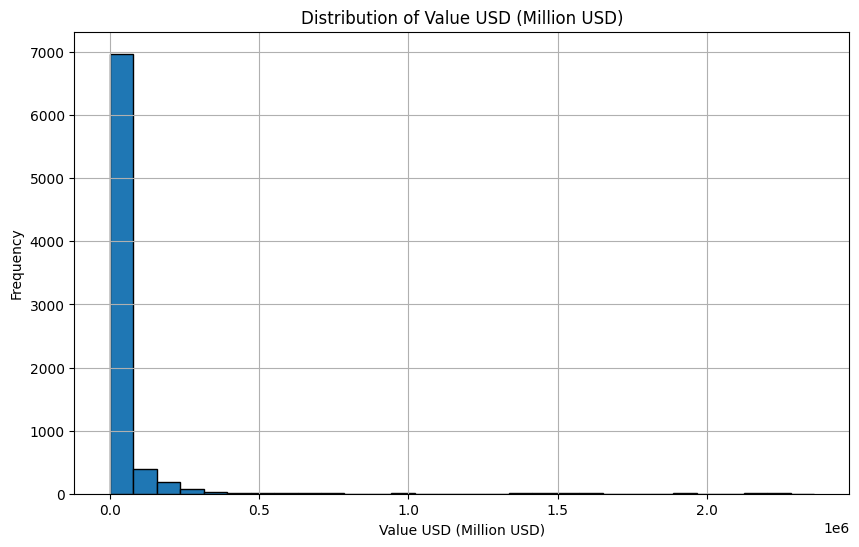

In [108]:
import matplotlib.pyplot as plt

# Load VA_NewUpdated.csv
va_data = pd.read_csv('VA_NewUpdated.csv')

# Define the column to check for outliers
value_column = 'Value USD (Million USD)'
values = va_data[value_column]

# Visualize distribution of 'Value USD (Million USD)'
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, edgecolor='black')
plt.title(f'Distribution of {value_column}')
plt.xlabel(value_column)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


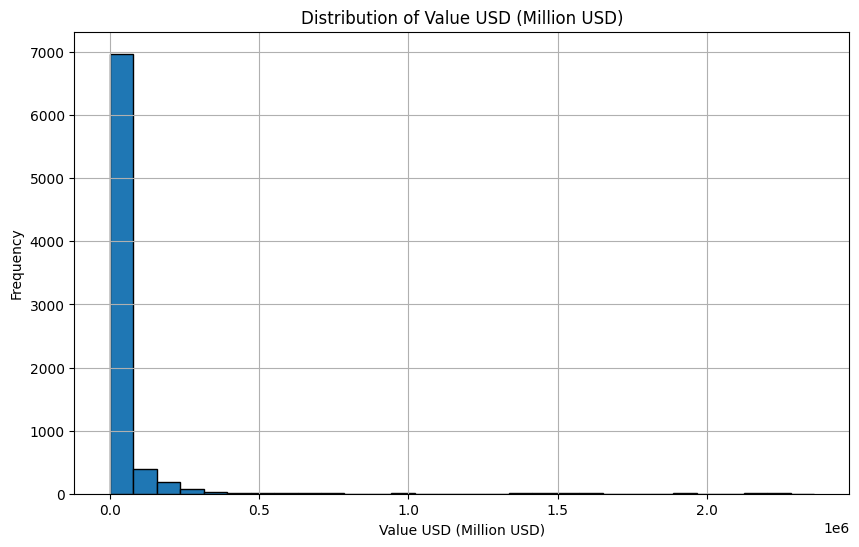

Bin 1: 0.34 - 78640.30 	 Count: 6972
Bin 2: 78640.30 - 157280.25 	 Count: 393
Bin 3: 157280.25 - 235920.21 	 Count: 184
Bin 4: 235920.21 - 314560.17 	 Count: 79
Bin 5: 314560.17 - 393200.12 	 Count: 31
Bin 6: 393200.12 - 471840.08 	 Count: 11
Bin 7: 471840.08 - 550480.04 	 Count: 13
Bin 8: 550480.04 - 629119.99 	 Count: 10
Bin 9: 629119.99 - 707759.95 	 Count: 7
Bin 10: 707759.95 - 786399.91 	 Count: 14
Bin 11: 786399.91 - 865039.86 	 Count: 2
Bin 12: 865039.86 - 943679.82 	 Count: 3
Bin 13: 943679.82 - 1022319.78 	 Count: 10
Bin 14: 1022319.78 - 1100959.73 	 Count: 0
Bin 15: 1100959.73 - 1179599.69 	 Count: 1
Bin 16: 1179599.69 - 1258239.65 	 Count: 1
Bin 17: 1258239.65 - 1336879.60 	 Count: 2
Bin 18: 1336879.60 - 1415519.56 	 Count: 9
Bin 19: 1415519.56 - 1494159.52 	 Count: 6
Bin 20: 1494159.52 - 1572799.47 	 Count: 5
Bin 21: 1572799.47 - 1651439.43 	 Count: 8
Bin 22: 1651439.43 - 1730079.39 	 Count: 1
Bin 23: 1730079.39 - 1808719.34 	 Count: 1
Bin 24: 1808719.34 - 1887359.30 	 Coun

In [109]:
import numpy as np

# Define the column to check for outliers
value_column = 'Value USD (Million USD)'
values = va_data[value_column]

# Plot histogram to visualize distribution
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, edgecolor='black')
plt.title(f'Distribution of {value_column}')
plt.xlabel(value_column)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and print histogram data
hist, bin_edges = np.histogram(values, bins=30)
for i, (count, bin_edge) in enumerate(zip(hist, bin_edges)):
    if i < len(bin_edges) - 1:
        print(f"Bin {i+1}: {bin_edge:.2f} - {bin_edges[i+1]:.2f} \t Count: {count}")

This distribution is skewed to the right/positive skewness. There are more lower values and fewer higher values. These are probably poor vs rich countries.

In [110]:
# Define the column to check for outliers
value_column = 'Value USD (Million USD)'
values = va_data[value_column]

# Calculate quartiles and IQR
Q1 = values.quantile(0.25)
Q3 = values.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_df = va_data[(values < lower_bound) | (values > upper_bound)]

# Print unique country names of the outliers
unique_countries = outliers_df['Country'].unique()
print("Unique countries with outliers in 'Value USD (Million USD)':")
for country in unique_countries:
    print(country)

Unique countries with outliers in 'Value USD (Million USD)':
Australia
Austria
Belgium
Canada
France
Germany
India
Indonesia
Ireland
Italy
Japan
Korea
Malaysia
Mexico
Nigeria
Norway
Pakistan
Philippines
Poland
Qatar
Saudi Arabia
Singapore
Spain
Sweden
Switzerland
Thailand
United Kingdom
United States


At this juncture we will retain outliers as it is a representation of real-world data points and helps to maintain transparency and clarity. A sensitivity analysis may be performed later to assess how sensitive the results are to the presence of outliers. If necessary a data transformation may be needed or robust statistical methods that are less sensitive to outliers (using median or trimmed mean).

In [111]:
# Load Ind_Updated.csv
ind_data = pd.read_csv('Ind_Updated.csv')

# Print columns
print("Columns in Ind_Updated.csv:")
print(ind_data.columns.tolist())

Columns in Ind_Updated.csv:
['Country', 'Year', 'ISIC division description', 'Indicator', 'Value', 'Unit']


In [112]:
# Load the data
ind_data = pd.read_csv('Ind_Updated.csv')

# Define the column to check for outliers
value_column = 'Value'

# Calculate quartiles and IQR
Q1 = ind_data[value_column].quantile(0.25)
Q3 = ind_data[value_column].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ind_data[(ind_data[value_column] < lower_bound) | (ind_data[value_column] > upper_bound)]

# Create bins for outlier analysis
bins = [-float('inf'), lower_bound, Q1, Q3, upper_bound, float('inf')]
bin_labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5']

# Assign outliers to bins
outliers['Bin'] = pd.cut(outliers[value_column], bins=bins, labels=bin_labels, include_lowest=True)

# Count outliers in each bin
bin_counts = outliers['Bin'].value_counts().sort_index()

# Print bin counts
print("Outlier Counts by Bin:")
for bin_label, count in bin_counts.items():
    print(f"{bin_label}: {count}")

# Print the outliers in each bin for further investigation
for bin_label in bin_labels:
    if bin_label in bin_counts.index:
        print(f"\nOutliers in {bin_label}:")
        print(outliers[outliers['Bin'] == bin_label][[value_column]])

# Print unique countries with outliers
unique_countries = outliers['Country'].unique()
print("\nUnique countries with outliers:")
print(unique_countries)

Outlier Counts by Bin:
Bin 1: 12
Bin 2: 0
Bin 3: 0
Bin 4: 0
Bin 5: 873

Outliers in Bin 1:
         Value
491     -11.87
569    -217.68
1384 -10658.41
1680   -370.55
1692   -318.75
1704   -229.95
1716   -197.59
1728   -170.57
1740   -143.88
1752   -106.06
3037    -25.17
3115   -557.64

Outliers in Bin 2:
Empty DataFrame
Columns: [Value]
Index: []

Outliers in Bin 3:
Empty DataFrame
Columns: [Value]
Index: []

Outliers in Bin 4:
Empty DataFrame
Columns: [Value]
Index: []

Outliers in Bin 5:
      Value
136   11.96
139   10.36
140   19.00
141   43.25
143   12.44
...     ...
6071  21.09
6072  22.33
6073   7.92
6074  11.55
6075  17.46

[873 rows x 1 columns]

Unique countries with outliers:
['Austria' 'Belgium' 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Croatia'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Namibia' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Serbia'

<ipython-input-112-611253fe9be0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Bin'] = pd.cut(outliers[value_column], bins=bins, labels=bin_labels, include_lowest=True)


At this juncture we will retain outliers as it is a representation of real-world data points and helps to maintain transparency and clarity. A sensitivity analysis may be performed later to assess how sensitive the results are to the presence of outliers. If necessary a data transformation may be needed or robust statistical methods that are less sensitive to outliers (using median or trimmed mean).

**3. Exploratory Data Analysis:**

In [113]:
# Load VA_NewUpdated.csv
va_data = pd.read_csv('VA_NewUpdated.csv')

# Summary Statistics
summary_stats_va = va_data.describe()
print("Summary Statistics for VA_NewUpdated.csv:")
print(summary_stats_va)

Summary Statistics for VA_NewUpdated.csv:
              Year  Value USD (Million USD)
count  7785.000000             7.785000e+03
mean   2017.570713             4.270331e+04
std       1.815533             1.666048e+05
min    2015.000000             3.400000e-01
25%    2016.000000             1.091350e+03
50%    2018.000000             5.044810e+03
75%    2019.000000             2.312337e+04
max    2021.000000             2.359199e+06


 The mean year is approximately 2017.57 and standard deviation is ~ 1.82 years (a wide range of values from very low to very high). The Value USD (Million USD) column indicates values ranging from 0.34 to 2,359,199 million USD, with a mean of approximately 42,703.31 USD million and a standard deviation of about 166,604.8 USD million.

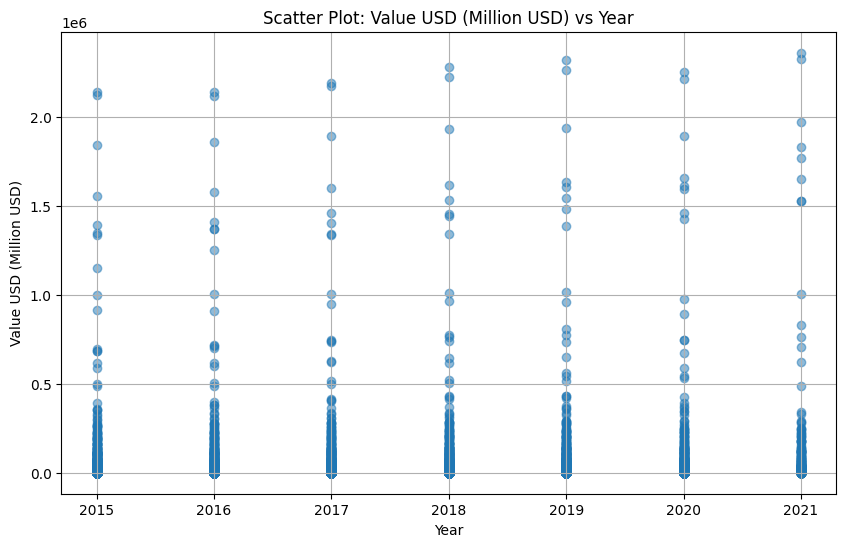

In [116]:
import matplotlib.pyplot as plt

# Scatter plot for Value USD (Million USD) vs Year
plt.figure(figsize=(10, 6))
plt.scatter(va_data['Year'], va_data['Value USD (Million USD)'], alpha=0.5)
plt.title('Scatter Plot: Value USD (Million USD) vs Year')
plt.xlabel('Year')
plt.ylabel('Value USD (Million USD)')
plt.grid(True)
plt.show()


In [117]:
# Correlation matrix for VA_NewUpdated.csv
# Select only numeric columns for correlation analysis
numeric_columns = va_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for numeric columns
correlation_va = numeric_columns.corr()
print("\nCorrelation Matrix for VA_NewUpdated.csv:")
print(correlation_va)


Correlation Matrix for VA_NewUpdated.csv:
                             Year  Value USD (Million USD)
Year                     1.000000                 0.038467
Value USD (Million USD)  0.038467                 1.000000


The correlation between the "Year" and "Value USD (Million USD)" is approximately 0.038467. This suggests a very weak positive linear relationship between the year and the value in USD (negligible).

The correlation of a variable with itself is always 1, indicating a perfect positive linear relationship (since it is identical); the correlation of the "Value USD (Million USD)" with itself is also 1, indicating a perfect positive linear relationship.

Weak Correlation and no strong patterns. The year alone is not a significant predictor of the value in USD.

In [118]:
# Grouping by Country and calculating mean Value USD (Million USD)
grouped_va = va_data.groupby('Country')['Value USD (Million USD)'].mean()
print("\nGrouped Mean Value USD (Million USD) by Country:")
print(grouped_va)



Grouped Mean Value USD (Million USD) by Country:
Country
Albania                   574.931111
Australia               68785.026429
Austria                 17757.911571
Belgium                 21412.779857
Benin                     602.160842
                           ...      
Trinidad and Tobago      1212.901711
United Kingdom         140505.439340
United States          930232.235214
Viet Nam                16755.893333
Zambia                   1210.419231
Name: Value USD (Million USD), Length: 74, dtype: float64


In [119]:
# Load Ind_Updated.csv
ind_data = pd.read_csv('Ind_Updated.csv')

# Summary Statistics
summary_stats_ind = ind_data.describe()
print("\nSummary Statistics for Ind_Updated.csv:")
print(summary_stats_ind)


Summary Statistics for Ind_Updated.csv:
              Year         Value
count  6123.000000   6123.000000
mean   2017.499755      2.419435
std       1.751499    137.650104
min    2015.000000 -10658.410000
25%    2016.000000      0.150000
50%    2017.000000      0.750000
75%    2019.000000      3.220000
max    2021.000000    553.540000


The average year is ~ 2017.5 wwith a standard deviation of 1.75 years meaning the data is spread out over a few years around the mean.

Value: The average is ~2.42 with a standard deviation 13765 indicating a high level of variabilitly in the data. Values range from -10658.41 to 553.54 - need to check for negative values (it is possible but unusual).

In [123]:
# Identify negative values in the 'Value' column
negative_values = ind_data[ind_data['Value'] < 0]

# Count the number of negative values
negative_value_count = negative_values['Value'].count()

# Print the count of negative values
print(f"Count of negative values in 'Value': {negative_value_count}")

# Print the 'Value' column for rows with negative values
print("\nNegative values in 'Value':")
print(negative_values['Value'])

# Print the unique countries with negative values
unique_countries_with_negative_values = negative_values['Country'].unique()
print("\nUnique countries with negative values:")
print(unique_countries_with_negative_values)

Count of negative values in 'Value': 12

Negative values in 'Value':
491       -11.87
569      -217.68
1384   -10658.41
1680     -370.55
1692     -318.75
1704     -229.95
1716     -197.59
1728     -170.57
1740     -143.88
1752     -106.06
3037      -25.17
3115     -557.64
Name: Value, dtype: float64

Unique countries with negative values:
['Bulgaria' 'Czech Republic' 'Estonia' 'Italy']


We will keep the negative values because they reflect real-world variability and anomalies in industrial data, which are crucial for understanding economic fluctuations and sector-specific challenges. Analyzing these values helps capture nuanced insights into industrial performance across different contexts and timeframes, enriching the robustness of our analytical findings.

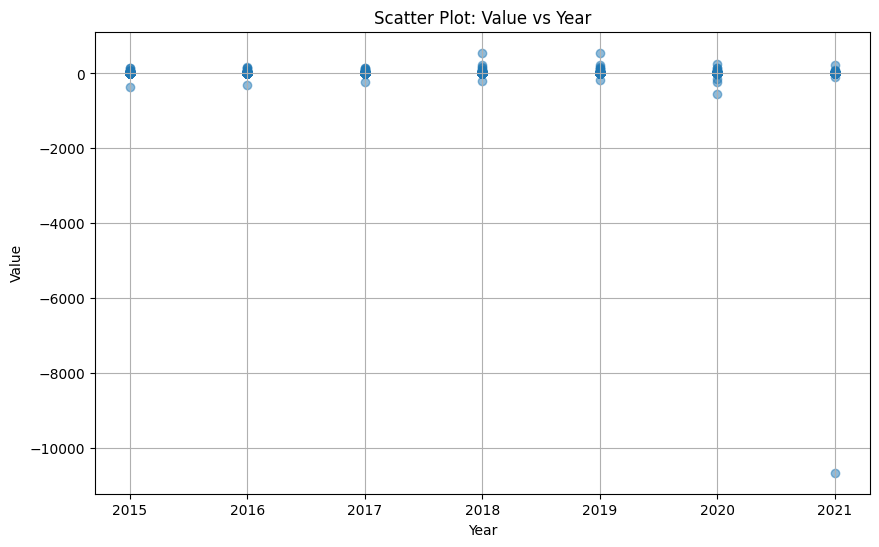

In [124]:
# Scatter plot for Value vs Year
plt.figure(figsize=(10, 6))
plt.scatter(ind_data['Year'], ind_data['Value'], alpha=0.5)
plt.title('Scatter Plot: Value vs Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()


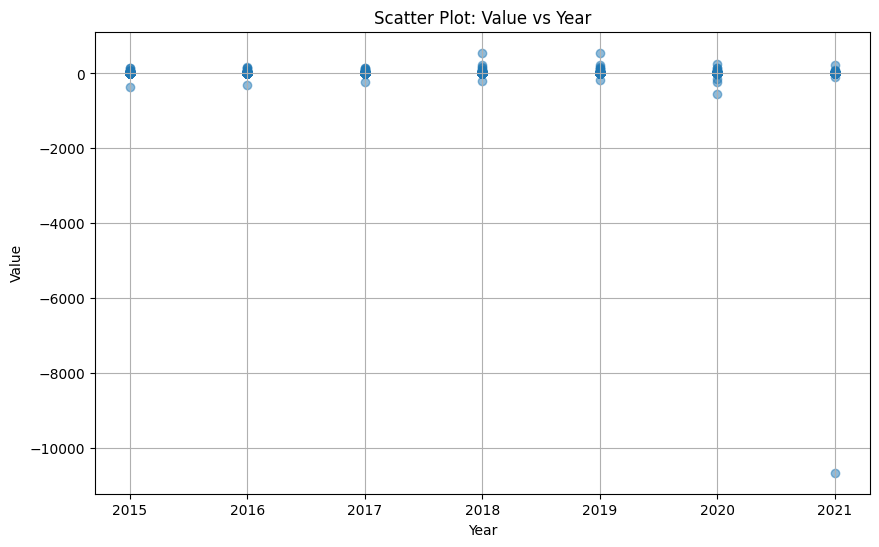

In [125]:
# Scatter plot for Value vs Year
plt.figure(figsize=(10, 6))
plt.scatter(ind_data['Year'], ind_data['Value'], alpha=0.5)
plt.title('Scatter Plot: Value vs Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [126]:
# Grouping by Year and calculating mean Value
grouped_ind = ind_data.groupby('Year')['Value'].mean()
print("\nGrouped Mean Value by Year:")
print(grouped_ind)



Grouped Mean Value by Year:
Year
2015     3.885444
2016     3.932769
2017     3.916547
2018     4.621506
2019     4.615460
2020     3.019273
2021   -49.529838
Name: Value, dtype: float64
